In [2]:
# 광고 캠페인 수익률 예측
# 디지털 마케팅에서 광고비 대비 수익률(ROI)를 정확히 예측

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [6]:
# [문제01]
import tensorflow as tf

In [7]:
# [문제02]
ad_df = pd.read_csv('data/5_ad_campaign_roi.csv')
ad_df.head()

,channel,cost_millions,duration_days,target_age,impressions,clicks,conversions,roi_percentage
0,검색광고,564.0,59.0,2030대,1051296.0,13865.0,1106.0,-77.92
1,TV,89.0,20.0,전체,111250.0,229.0,18.0,-106.58
2,라디오,62.0,76.0,2030대,153450.0,6102.0,174.0,-92.96
3,라디오,21.0,18.0,10대,23037.0,1007.0,12.0,-96.55
4,TV,971.0,90.0,4050대,1310850.0,62609.0,3036.0,-85.28


In [8]:
import platform
from matplotlib import rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='cost_millions', ylabel='roi_percentage'>

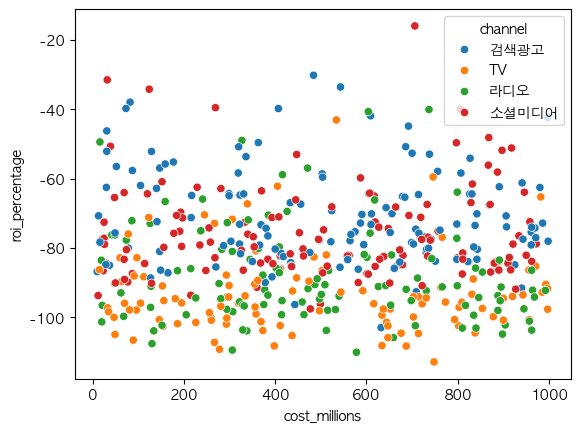

In [9]:
# [문제03]
sns.scatterplot(data=ad_df, x='cost_millions', y='roi_percentage', hue='channel')

<Axes: xlabel='channel', ylabel='roi_percentage'>

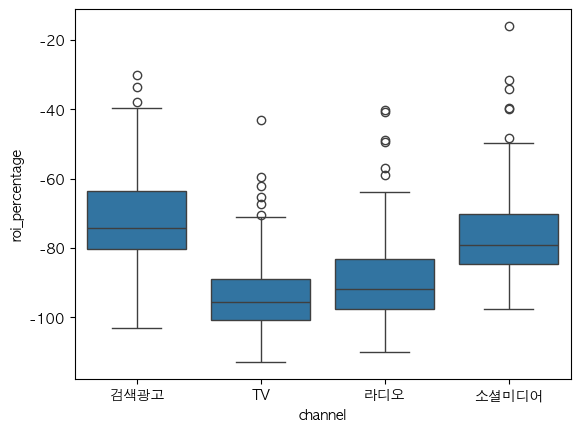

In [10]:
# [문제04]
sns.boxplot(data=ad_df, x='channel', y='roi_percentage')

In [11]:
답안04 = '검색광고'

In [17]:
# [문제05]
ad_df.groupby(['channel','target_age'])[['clicks','conversions']].mean()

clicks  conversions
channel target_age                           
TV      10대         18327.173913   816.739130
        2030대       29507.216216  1535.243243
        4050대       22948.833333  1063.291667
        전체          22613.200000   878.960000
검색광고    10대         30462.564103  1641.333333
        2030대       31164.052632  1487.210526
        4050대       26442.000000  1472.277778
        전체          21844.466667  1260.866667
라디오     10대         20011.866667  1355.200000
        2030대       21314.944444  1015.694444
        4050대       19098.260870  1543.260870
        전체          22377.281250  1085.812500
소셜미디어   10대         23496.846154  1349.000000
        2030대       26254.350000  1485.100000
        4050대       24430.833333  1265.933333
        전체          26585.161290  1739.483871

In [19]:
# [문제06]
ad_pre = ad_df.copy()
ad_pre.isnull().sum()

channel            0
cost_millions     14
duration_days     21
target_age         0
impressions        0
clicks             0
conversions        0
roi_percentage     0
dtype: int64

In [20]:
null_col = ['cost_millions','duration_days']
for col in null_col:
    mean_col = ad_pre[col].mean()
    ad_pre[col].fillna(mean_col, inplace=True)

ad_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   channel         500 non-null    object 
 1   cost_millions   500 non-null    float64
 2   duration_days   500 non-null    float64
 3   target_age      500 non-null    object 
 4   impressions     500 non-null    float64
 5   clicks          500 non-null    float64
 6   conversions     500 non-null    float64
 7   roi_percentage  500 non-null    float64
dtypes: float64(6), object(2)
memory usage: 31.4+ KB


In [22]:
# [문제07]
ad_pre['CTR'] = np.where(ad_pre['impressions'] == 0, 0, ad_pre['clicks'] / ad_pre['impressions'])
ad_pre.head()

,channel,cost_millions,duration_days,target_age,impressions,clicks,conversions,roi_percentage,CTR
0,검색광고,564.0,59.0,2030대,1051296.0,13865.0,1106.0,-77.92,0.013188
1,TV,89.0,20.0,전체,111250.0,229.0,18.0,-106.58,0.002058
2,라디오,62.0,76.0,2030대,153450.0,6102.0,174.0,-92.96,0.039765
3,라디오,21.0,18.0,10대,23037.0,1007.0,12.0,-96.55,0.043712
4,TV,971.0,90.0,4050대,1310850.0,62609.0,3036.0,-85.28,0.047762


In [92]:
# [문제08]
ad_encoded = pd.get_dummies(ad_pre, columns=['channel', 'target_age'], dtype=int)

X = ad_encoded.drop(['roi_percentage'], axis=1)
y = ad_encoded['roi_percentage']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2024)

print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(400, 14) (100, 14)
(400,) (100,)


In [76]:
# [문제09]
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [77]:
# [문제10]
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
# [문제11]
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=2024)
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=7, random_state=2024)

In [79]:
importances = model_rf.feature_importances_ # 해당 feature 가 클래스를 나누는데 얼마나 영향을 미쳤는지
importances

array([0.11492007, 0.02358919, 0.02453722, 0.02656976, 0.40252876,
       0.12716955, 0.05749926, 0.09669771, 0.04306102, 0.06821321,
       0.00244996, 0.00423994, 0.00476054, 0.00376381])

In [80]:
feature_names = X.columns
feature_names

Index(['cost_millions', 'duration_days', 'impressions', 'clicks',
       'conversions', 'CTR', 'channel_TV', 'channel_검색광고', 'channel_라디오',
       'channel_소셜미디어', 'target_age_10대', 'target_age_2030대',
       'target_age_4050대', 'target_age_전체'],
      dtype='object')

In [81]:
most_important_idx = np.argmax(importances)
most_important_idx

4

In [82]:
most_important_feature = feature_names[most_important_idx]
답안11 = most_important_feature
print(most_important_feature)

conversions


In [83]:
# [문제12]
from sklearn.metrics import mean_absolute_error, r2_score

lr_pred = model_lr.predict(X_valid_scaled)
lr_mae = mean_absolute_error(lr_pred, y_valid)
lr_r2 = r2_score(lr_pred, y_valid)

print(f"lr mae : {lr_mae:.4f}, lr r2 : {lr_r2:.4f}")

rf_pred = model_rf.predict(X_valid_scaled)
rf_mae = mean_absolute_error(rf_pred, y_valid)
rf_r2 = r2_score(rf_pred, y_valid)

print(f"rf mae : {rf_mae:.4f}, rf r2 : {rf_r2:.4f}")


lr mae : 6.9885, lr r2 : 0.6340
rf mae : 5.3600, rf r2 : 0.6972


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [85]:
X_train_scaled.shape

(400, 14)

In [89]:
# [문제13]
model_dl = Sequential([
    Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(16, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mean_absolute_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs = 50,
    batch_size = 16,
    validation_data = (X_valid_scaled, y_valid)
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)

Epoch 1/50
25/25 [==============================] - 0s 5ms/step - loss: 80.3044 - val_loss: 81.6128
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 79.5156 - val_loss: 80.7199
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 78.3430 - val_loss: 79.3051
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 76.4796 - val_loss: 77.0584
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 73.5908 - val_loss: 73.6747
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 69.3787 - val_loss: 68.8824
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 63.5239 - val_loss: 62.2099
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 55.8700 - val_loss: 53.7396
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 46.9162 - val_loss: 43.8281
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 36.9699 - val_loss: 32.3589

6.409480094909668

In [93]:
new_campaign_data = np.array([[500, 30, 1000000, 15000, 1000, 0.015, 0, 0, 1, 0, 0, 1, 0, 0]])
new_campaign_data.shape

(1, 14)

In [96]:
scaled_campaign_data = scaler.transform(new_campaign_data)
predicted_dl_df = model_dl.predict(scaled_campaign_data)
print(predicted_dl_df[0][0])

1/1 [==============================] - 0s 14ms/step
-90.73874


/opt/anaconda3/envs/aice/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
